In [1]:
import talib
import yfinance as yf
import mplfinance as mpf
from talib import abstract

In [2]:
import pandas as pd

In [3]:
from datetime import datetime

In [4]:
current_dateTime = datetime.now()

In [5]:
list(talib.get_function_groups())

['Cycle Indicators',
 'Math Operators',
 'Math Transform',
 'Momentum Indicators',
 'Overlap Studies',
 'Pattern Recognition',
 'Price Transform',
 'Statistic Functions',
 'Volatility Indicators',
 'Volume Indicators']

In [6]:
data_1h = yf.download('BTC-USD', start='2023-12-14', end=current_dateTime.date(), interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [7]:
data_1d = yf.download('BTC-USD', start='2022-12-14', end=current_dateTime.date(), interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [8]:
data_1h.rename(columns= {"Open":"open",
                      "High": "high",
                      "Low": "low",
                      "Adj Close": "close",
                      "Volume" : "volume"

}, inplace=True)

data_1d.rename(columns= {"Open":"open",
                      "High": "high",
                      "Low": "low",
                      "Adj Close": "close",
                      "Volume" : "volume"

}, inplace=True)

In [9]:
data_1h['date'] = data_1h.index.date

In [191]:
class calculate_ta_indicators:
    def __init__(self, data, fastperiod=12, slowperiod=26, signalperiod=9, rsi = 12, bollinger = 20, aroon_osc = 12):
        # self.sma_1 = abstract.SMA(data, timeperiod=12)
        # self.sma_2 = abstract.SMA(data, timeperiod=26)
        self.macd = abstract.MACD(data, fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
        self.rsi = pd.DataFrame({'rsi' : abstract.RSI(data, timeperiod=rsi)})
        self.bollinger = abstract.BBANDS(data, timeperiod = bollinger)
        self.aroon_osc = pd.DataFrame({'aroon_osc' : abstract.AROONOSC(data, n = aroon_osc)})

        self.hammer = pd.DataFrame({'hammer' : abstract.CDLHAMMER(data)})
        self.shooting_star = pd.DataFrame({'shooting_star' : abstract.CDLSHOOTINGSTAR(data)})
        self.evening_star = pd.DataFrame({'evening_star' : abstract.CDLEVENINGSTAR(data)})
        self.morning_star = pd.DataFrame({'morning_star' : abstract.CDLMORNINGSTAR(data)})
        self.piersing = pd.DataFrame({'piersing' : abstract.CDLPIERCING(data)})
        self.three_white_soldiers = pd.DataFrame({'three_white_soldiers' : abstract.CDL3WHITESOLDIERS(data)})
        self.three_black_crowns = pd.DataFrame({'three_black_crowns' : abstract.CDL3BLACKCROWS(data)})
        self.hanging_man = pd.DataFrame({'hanging_man' : abstract.CDLHANGINGMAN(data)})
        self.dark_cloud_clover = pd.DataFrame({'dark_cloud_clover' : abstract.CDLDARKCLOUDCOVER(data)})
    

In [11]:
indicators_1h = calculate_ta_indicators(data_1h)
indicators_1d = calculate_ta_indicators(data_1d)

In [11]:
data['hammer'] = hammer
data['shooting_star'] = shooting_star
data['evening_star'] = evening_star
data['morning_star'] = morning_star
data['piersing'] = piersing
data['three_white_soldiers'] = three_white_soldiers
data['three_black_crowns'] = three_black_crowns
data['hanging_man'] = hanging_man
data['dark_cloud_clover'] = dark_cloud_clover


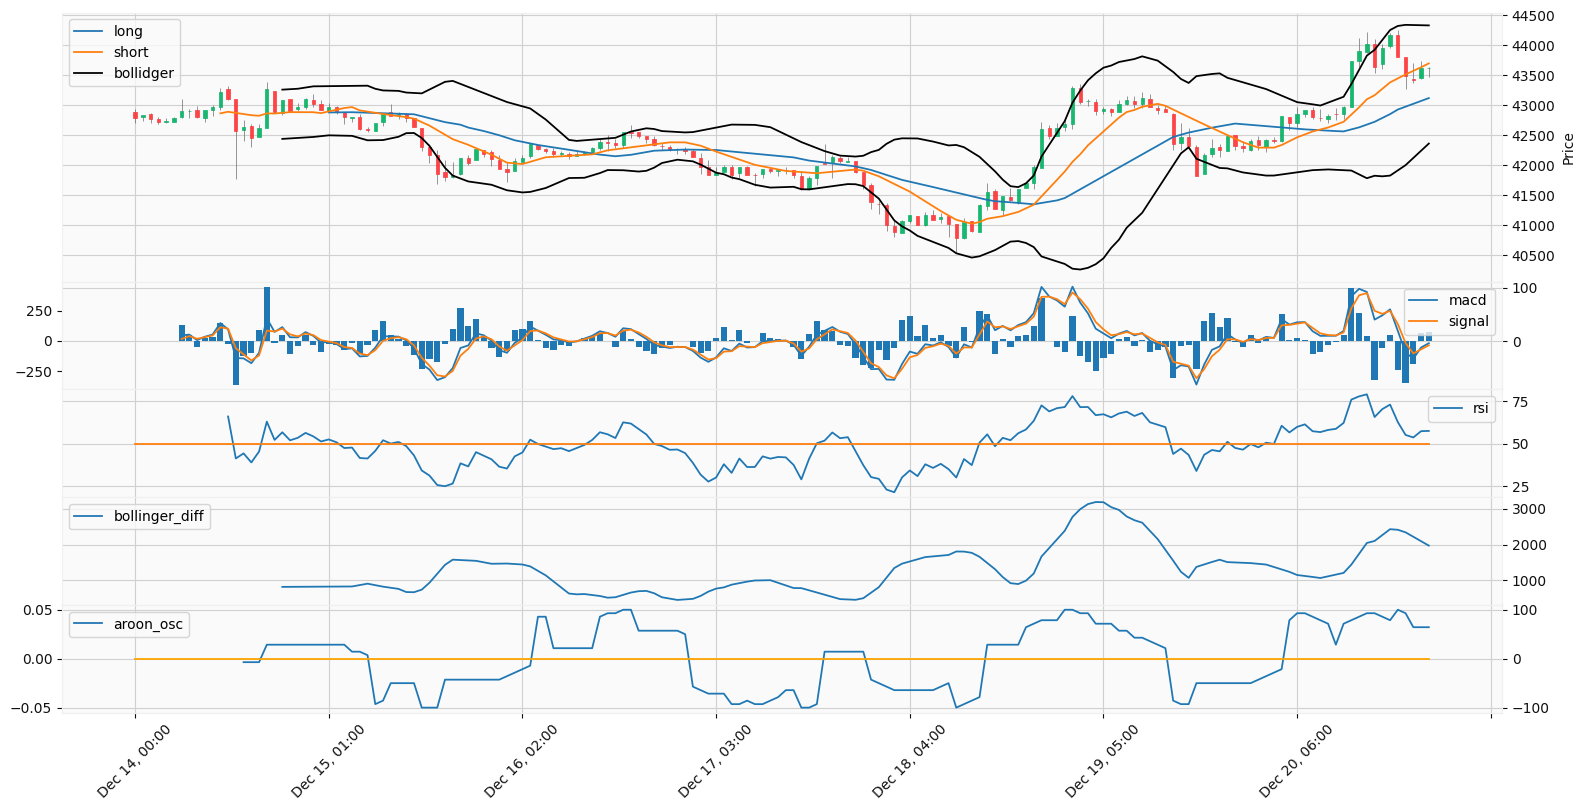

In [12]:

sma_7_plot = mpf.make_addplot(sma_1, label = 'short')
sma_10_plot = mpf.make_addplot(sma_2, label = 'long')

bollinger_up_plot = mpf.make_addplot(bollinger['upperband'], label = 'bollidger', color='black')
bollinger_down_plot = mpf.make_addplot(bollinger['lowerband'], color='black')

makdi_hist = mpf.make_addplot(makdi['macdhist'], type='bar', panel=1)
makdi_macd = mpf.make_addplot(makdi['macd'], panel=1, label = 'macd')
makdi_macdsignal = mpf.make_addplot(makdi['macdsignal'], panel=1, label = 'signal')

rsi_plot = mpf.make_addplot(rsi, panel=2, label = 'rsi')
rsi_50_level = mpf.make_addplot(pd.Series([50] * len(rsi), index=rsi.index), panel=2)

bollinger_diff = mpf.make_addplot(bollinger['upperband'] - bollinger['lowerband'], panel=3, label = 'bollinger_diff')

aroon_osc_plot = mpf.make_addplot(aroon_osc, panel=4, label = 'aroon_osc')
aroon_osc_0_level = mpf.make_addplot(pd.Series([0] * len(aroon_osc), index=aroon_osc.index), panel=4, color='orange')


plots = [sma_10_plot, sma_7_plot, bollinger_up_plot, bollinger_down_plot, makdi_hist, makdi_macd, makdi_macdsignal, rsi_plot, rsi_50_level, bollinger_diff, 
aroon_osc_plot, aroon_osc_0_level]

mpf.plot(data, addplot = plots, type = 'candle', style='yahoo', figsize=(20,10))



In [7]:
class robot:
    def __init__(self, cash):
        self.cash = cash
        self.qty = 0
    
    def buy(self, qty, price):
        self.qty += qty
        self.cash -= price*qty
    
    def sell(self, qty, price):
        self.qty -= qty
        self.cash += price*qty

In [14]:
data['mean'] = data[['low','high']].mean(axis=1)

In [15]:
data['makdi'] = makdi['macdhist']
# data['aroon_osc'] = aroon_osc
# data['rsi'] = rsi

In [16]:
test_data = data.dropna(axis=0)

In [17]:
bot = robot(cash=2000)

In [18]:
test_data.reset_index(inplace=True)

In [19]:
import optuna
qty = 1
init_sum = 50000
def objective(trial):
    
    fastperiod = trial.suggest_int('fastperiod ' ,2 , 30)
    slowperiod = trial.suggest_int('slowperiod', 2, 30)
    signalperiod = trial.suggest_int('signalperiod', 2, 30)
    makdi = abstract.MACD(data, fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
    data['makdi'] = makdi['macdhist']
    test_data = data.dropna(axis=0)
    test_data.reset_index(inplace=True)
    bot = robot(cash=init_sum)
    data['makdi'] = makdi['macdhist']

    for i in range(len(test_data) - 1):
        if bot.cash < qty * test_data['mean'].loc[i+1]:
            pass
            # print('Not money enough')
        else:
            if test_data['makdi'].loc[i] < 0 and test_data['makdi'].loc[i+1] > 0:
                bot.buy(qty=qty, price=test_data['mean'].loc[i+1])
                b_p = test_data['mean'].loc[i+1]
                # print(f'buy price {b_p} buy_date {test_data["Datetime"].loc[i+1]}')


        if bot.qty != 0: 
            if test_data['makdi'].loc[i] > 0 and test_data['makdi'].loc[i+1] < 0:
        
                bot.sell(qty=qty, price=test_data['mean'].loc[i+1])
                s_p = test_data['mean'].loc[i+1]
                # print(f'sell price {s_p} sell_date {test_data["Datetime"].loc[i+1]}')

                # print(f"Прибыль {(s_p - b_p) / b_p * 100} %, Остаток {bot.cash}")

 

    return (bot.qty * test_data['mean'].loc[i+1] + bot.cash - init_sum)/init_sum *100

e:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-12-23 20:19:32,184] Trial 0 finished with value: 1.7324374999999999 and parameters: {'fastperiod ': 30, 'slowperiod': 12, 'signalperiod': 18}. Best is trial 0 with value: 1.7324374999999999.
[I 2023-12-23 20:19:32,192] Trial 1 finished with value: 3.68144921875 and parameters: {'fastperiod ': 15, 'slowperiod': 14, 'signalperiod': 17}. Best is trial 1 with value: 3.68144921875.


[I 2023-12-23 20:19:32,200] Trial 2 finished with value: 1.56866015625 and parameters: {'fastperiod ': 25, 'slowperiod': 11, 'signalperiod': 27}. Best is trial 1 with value: 3.68144921875.
[I 2023-12-23 20:19:32,210] Trial 3 finished with value: 5.56830859375 and parameters: {'fastperiod ': 20, 'slowperiod': 27, 'signalperiod': 3}. Best is trial 3 with value: 5.56830859375.
[I 2023-12-23 20:19:32,219] Trial 4 finished with value: 1.54528515625 and parameters: {'fastperiod ': 20, 'slowperiod': 28, 'signalperiod': 25}. Best is trial 3 with value: 5.56830859375.
[I 2023-12-23 20:19:32,230] Trial 5 finished with value: 2.0724765625 and parameters: {'fastperiod ': 17, 'slowperiod': 30, 'signalperiod': 21}. Best is trial 3 with value: 5.56830859375.
[I 2023-12-23 20:19:32,242] Trial 6 finished with value: 5.56005859375 and parameters: {'fastperiod ': 30, 'slowperiod': 24, 'signalperiod': 2}. Best is trial 3 with value: 5.56830859375.
[I 2023-12-23 20:19:32,252] Trial 7 finished with value: 5

In [22]:
study.best_params

{'fastperiod ': 2, 'slowperiod': 6, 'signalperiod': 2}

In [8]:
class patterns:
    def __init__(self, data):
        self.data = data

    def check_pattern(self, pattern, i):
        points = 0 
        if self.data[pattern].loc[i+1] == 100:
            points += 1
        elif self.data[pattern].loc[i+1] == -100:
            points -= 1
        elif self.data[pattern].loc[i+1] == 0:
            pass

        return points

In [29]:
patterns(test_data).check_pattern('hammer', i)

0

In [ ]:
qty = 1
init_sum = 50000

fastperiod = study.best_params['fastperiod ']
slowperiod = study.best_params['slowperiod']
signalperiod = study.best_params['signalperiod']
# fastperiod, slowperiod, signalperiod = 14, 27, 9
makdi = abstract.MACD(data, fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
data['makdi'] = makdi['macdhist']
test_data = data.dropna(axis=0)
test_data.reset_index(inplace=True)
bot = robot(cash=init_sum)
data['makdi'] = makdi['macdhist']

pattern_list = ['hammer',
       'shooting_star', 'evening_star', 'morning_star', 'piersing',
       'three_white_soldiers', 'three_black_crowns', 'hanging_man',
       'dark_cloud_clover']

pat_checker = patterns(test_data)

for i in range(len(test_data) - 1):
    if bot.cash < qty * test_data['mean'].loc[i+1]:
        print('Not money enough')
    else:
        points = 0 
        if test_data['makdi'].loc[i] < 0 and test_data['makdi'].loc[i+1] > 0:
            points += 1

        for pattern in pattern_list:
            points += pat_checker.check_pattern(pattern, i)
        
        if points > 0:

            bot.buy(qty=qty, price=test_data['mean'].loc[i+1])
            b_p = test_data['mean'].loc[i+1]
            print(f'buy price {b_p} buy_date {test_data["Datetime"].loc[i+1]}')


    if bot.qty != 0: 
        if test_data['makdi'].loc[i] > 0 and test_data['makdi'].loc[i+1] < 0:
    
            bot.sell(qty=qty, price=test_data['mean'].loc[i+1])
            s_p = test_data['mean'].loc[i+1]
            print(f'sell price {s_p} sell_date {test_data["Datetime"].loc[i+1]}')

            print(f"Прибыль {(s_p - b_p) / b_p * 100} %, Остаток {bot.cash}")

print((bot.qty * test_data['mean'].loc[i+1] + bot.cash - init_sum)/init_sum *100)

In [24]:
bot.qty * test_data['mean'].loc[i+1] + bot.cash

52442.744140625

# Bybit #

In [10]:
from config import api_key, secret
from pybit.unified_trading import HTTP

In [11]:
import time

In [12]:
session = HTTP(api_key=api_key, api_secret=secret, testnet=False)

In [22]:
SYMBOL = "BTCUSD"
LIMIT = 60
INTERVAL = 3


In [288]:
from get_candels import get_candels as g

In [125]:
class get_candels:
    def __init__(self, session, category = "inverse", symbol = "BTCUSD", interval = 1, limit = 60):
        self.session = session

        self.category = category
        self.symbol = symbol
        self.interval = interval
        self.limit = limit

    def getting_server_time(self):

        current_time = pd.to_datetime(int(session.get_server_time().get('result')['timeSecond']), unit='s')
        self.current_time_without_seconds = int(current_time.replace(second=0, microsecond=0).timestamp()) * 1000

    def get_response(self):

        self.getting_server_time()

        if self.interval in [1,3,5,15,30,60,120,240,360,720]:
            time_koef = 60
            time_inteval = self.interval
        
        elif self.interval == 'D':
            time_koef = 86400
            time_inteval = 1
        
        elif self.interval == 'W':
            time_koef = 86400 * 7
            time_inteval = 1
        
        elif self.interval == 'M':
            time_koef = 86400 * 30
            time_inteval = 1
        
        else:
            raise ValueError(f'Invalid interval: {self.interval}')

        response = session.get_kline(
        category=self.category,
        symbol=self.symbol,
        interval=self.interval,
        start=(self.current_time_without_seconds/1000 -  time_inteval * self.limit * time_koef) * 1000,
        end=self.current_time_without_seconds, limit = 1000
        ).get('result')

        return response
    
    def getting_data(self):

        response = self.get_response()
        
        data = pd.DataFrame(response['list'])

        data.rename(columns= {0 : 'time',   
                      1:"open",
                      2: "high",
                      3: "low",
                      4: "close",
                      5 : "volume",
                      6: "turnover"}, inplace=True)
        
        data['time'] = data['time'].apply(lambda x: pd.to_datetime(int(x[:-3]), unit='s'))

        data[["open", "high", "low", "close", "volume", "turnover"]] = data[["open", "high", "low", "close", "volume", "turnover"]].astype(float)

        data['date'] = data['time'].dt.date

        data.sort_values(by='time', ignore_index=True, inplace=True)

        # data.set_index(data['time'], inplace=True)

        return data



In [218]:
def united_dfs(candles, ta_indicators):
    df = candles
    
    for key in ta_indicators.__dict__.keys():
        df = pd.concat([df, ta_indicators.__dict__[key]], axis=1)
    
    df.dropna(axis=0, inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df
    

In [277]:
def objective(trial):
    
    fastperiod_1h = trial.suggest_int('fastperiod_1h' ,2 , 30)
    slowperiod_1h = trial.suggest_int('slowperiod_1h', 2, 30)
    signalperiod_1h = trial.suggest_int('signalperiod_1h', 2, 30)
    rsi_1h = trial.suggest_int('rsi_1h', 2, 30)

    fastperiod_2h = trial.suggest_int('fastperiod_2h' ,2 , 30)
    slowperiod_2h = trial.suggest_int('slowperiod_2h', 2, 30)
    signalperiod_2h = trial.suggest_int('signalperiod_2h', 2, 30)
    rsi_2h = trial.suggest_int('rsi_2h', 2, 30)

    candels_downloader_1h = get_candels(session=session, interval = 60, limit=999)
    data_1h = candels_downloader_1h.getting_data()
    indicators_1h = calculate_ta_indicators(data_1h, fastperiod=fastperiod_1h, slowperiod=slowperiod_1h, signalperiod=signalperiod_1h, rsi=rsi_1h)

    candels_downloader_2h = get_candels(session=session, interval = 120, limit=999)
    data_2h = candels_downloader_2h.getting_data()
    indicators_2h = calculate_ta_indicators(data_2h, fastperiod=fastperiod_2h, slowperiod=slowperiod_2h, signalperiod=signalperiod_2h, rsi=rsi_2h)

    small_period = united_dfs(data_1h, indicators_1h)
    bigger_period = united_dfs(data_2h, indicators_2h)

    qty = 1
    init_sum = 50000
    bot = robot(cash=init_sum)

    pattern_list = ['hammer', 'shooting_star', 'evening_star', 'morning_star', 'piersing', 'three_white_soldiers', 'three_black_crowns', 'hanging_man', 'dark_cloud_clover']

    open_p = []
    open_d = []

    close_p = []
    close_d = []

    for i in range(len(small_period) - 1):
        bigger_period_data_i = bigger_period[bigger_period['time'] <= small_period['time'].loc[i]].iloc[-1]
        bigger_period_data_i_1 = bigger_period[bigger_period['time'] <= small_period['time'].loc[i+1]].iloc[-1]

        if bot.cash < qty * small_period['open'].loc[i+1]:
            pass
        else:
            points = 0 

            if small_period['macdhist'].loc[i] < 0 and small_period['macdhist'].loc[i+1] > 0:
                points += 1
            elif small_period['macdhist'].loc[i] > 0 and small_period['macdhist'].loc[i+1] < 0:
                points -= 1
                
            if small_period['rsi'].loc[i] <= 30:
                points += 1
            elif small_period['rsi'].loc[i] >= 70:
                points -= 1
            
            if bigger_period_data_i['macdhist'] < 0 and bigger_period_data_i_1['macdhist'] > 0:
                points += 1
            elif bigger_period_data_i['macdhist'] > 0 and bigger_period_data_i_1['macdhist'] < 0:
                points -= 1
            
            if bigger_period_data_i['rsi'] <= 30:
                points += 1
            elif bigger_period_data_i['rsi'] >= 70:
                points -= 1

            pat_checker = patterns(small_period)

            for pattern in pattern_list:
                points += pat_checker.check_pattern(pattern, i)
            
            if points > 0:
                bot.buy(qty=qty, price=small_period['open'].loc[i+1])
                b_p = small_period['open'].loc[i+1]
                # print(f'buy price {b_p} buy_date {small_period["time"].loc[i+1]}')

                open_p.append(b_p)
                open_d.append(small_period["time"].loc[i+1])
        
        if bot.qty != 0:
            if small_period['macdhist'].loc[i] > 0 and small_period['macdhist'].loc[i+1] < 0:

                bot.sell(qty=qty, price=small_period['open'].loc[i+1])
                s_p = small_period['open'].loc[i+1]
                # print(f'sell price {s_p} sell_date {small_period["time"].loc[i+1]}')

                # print(f"Прибыль {(s_p - b_p) / b_p * 100} %, Остаток {bot.cash}")

                close_p.append(s_p)
                close_d.append(small_period["time"].loc[i+1])
            
            
    return (bot.qty * small_period['open'].loc[i+1] + bot.cash - init_sum)/init_sum *100


        
    
    


In [279]:
import optuna

e:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

In [281]:
study.best_params

{'fastperiod_1h': 19,
 'slowperiod_1h': 2,
 'signalperiod_1h': 2,
 'rsi_1h': 20,
 'fastperiod_2h': 17,
 'slowperiod_2h': 15,
 'signalperiod_2h': 6,
 'rsi_2h': 27}

In [286]:
# fastperiod_1h = study.best_params['fastperiod_1h']
# slowperiod_1h = study.best_params['slowperiod_1h']
# signalperiod_1h = study.best_params['signalperiod_1h']
# rsi_1h = study.best_params['rsi_1h']

# fastperiod_2h = study.best_params['fastperiod_2h']
# slowperiod_2h = study.best_params['slowperiod_2h']
# signalperiod_2h = study.best_params['signalperiod_2h']
# rsi_2h = study.best_params['rsi_2h']

fastperiod_1h = 2
slowperiod_1h = 19
signalperiod_1h = study.best_params['signalperiod_1h']
rsi_1h = study.best_params['rsi_1h']

fastperiod_2h = 15
slowperiod_2h = 17
signalperiod_2h = study.best_params['signalperiod_2h']
rsi_2h = study.best_params['rsi_2h']

candels_downloader_1h = get_candels(session=session, interval = 60, limit=999)
data_1h = candels_downloader_1h.getting_data()
indicators_1h = calculate_ta_indicators(data_1h, fastperiod=fastperiod_1h, slowperiod=slowperiod_1h, signalperiod=signalperiod_1h, rsi=rsi_1h)

candels_downloader_2h = get_candels(session=session, interval = 120, limit=999)
data_2h = candels_downloader_2h.getting_data()
indicators_2h = calculate_ta_indicators(data_2h, fastperiod=fastperiod_2h, slowperiod=slowperiod_2h, signalperiod=signalperiod_2h, rsi=rsi_2h)

small_period = united_dfs(data_1h, indicators_1h)
bigger_period = united_dfs(data_2h, indicators_2h)

qty = 1
init_sum = 50000
bot = robot(cash=init_sum)

pattern_list = ['hammer', 'shooting_star', 'evening_star', 'morning_star', 'piersing', 'three_white_soldiers', 'three_black_crowns', 'hanging_man', 'dark_cloud_clover']

open_p = []
open_d = []

close_p = []
close_d = []

for i in range(len(small_period) - 1):
    bigger_period_data_i = bigger_period[bigger_period['time'] <= small_period['time'].loc[i]].iloc[-1]
    bigger_period_data_i_1 = bigger_period[bigger_period['time'] <= small_period['time'].loc[i+1]].iloc[-1]

    if bot.cash < qty * small_period['open'].loc[i+1]:
        pass
    else:
        points = 0 

        if small_period['macdhist'].loc[i] < 0 and small_period['macdhist'].loc[i+1] > 0:
            points += 1
        elif small_period['macdhist'].loc[i] > 0 and small_period['macdhist'].loc[i+1] < 0:
            points -= 1
            
        if small_period['rsi'].loc[i] <= 30:
            points += 1
        elif small_period['rsi'].loc[i] >= 70:
            points -= 1
        
        if bigger_period_data_i['macdhist'] < 0 and bigger_period_data_i_1['macdhist'] > 0:
            points += 1
        elif bigger_period_data_i['macdhist'] > 0 and bigger_period_data_i_1['macdhist'] < 0:
            points -= 1
        
        if bigger_period_data_i['rsi'] <= 30:
            points += 1
        elif bigger_period_data_i['rsi'] >= 70:
            points -= 1

        pat_checker = patterns(small_period)

        for pattern in pattern_list:
            points += pat_checker.check_pattern(pattern, i)
        
        if points > 0:
            bot.buy(qty=qty, price=small_period['open'].loc[i+1])
            b_p = small_period['open'].loc[i+1]
            print(f'buy price {b_p} buy_date {small_period["time"].loc[i+1]}')

            open_p.append(b_p)
            open_d.append(small_period["time"].loc[i+1])
    
    if bot.qty != 0:
        if small_period['macdhist'].loc[i] > 0 and small_period['macdhist'].loc[i+1] < 0:

            bot.sell(qty=qty, price=small_period['open'].loc[i+1])
            s_p = small_period['open'].loc[i+1]
            print(f'sell price {s_p} sell_date {small_period["time"].loc[i+1]}')

            print(f"Прибыль {(s_p - b_p) / b_p * 100} %, Остаток {bot.cash}")

            close_p.append(s_p)
            close_d.append(small_period["time"].loc[i+1])
        
        
print((bot.qty * small_period['open'].loc[i+1] + bot.cash - init_sum)/init_sum *100)

buy price 36277.0 buy_date 2023-11-18 07:00:00
sell price 36488.0 sell_date 2023-11-18 11:00:00
Прибыль 0.5816357471676269 %, Остаток 50211.0
buy price 36426.5 buy_date 2023-11-18 12:00:00
sell price 36465.5 sell_date 2023-11-18 13:00:00
Прибыль 0.10706491153418528 %, Остаток 50250.0
buy price 36456.0 buy_date 2023-11-18 14:00:00
sell price 36689.5 sell_date 2023-11-18 17:00:00
Прибыль 0.6404981347377661 %, Остаток 50483.5
buy price 36640.0 buy_date 2023-11-18 18:00:00
sell price 36722.5 sell_date 2023-11-18 19:00:00
Прибыль 0.2251637554585153 %, Остаток 50566.0
buy price 36525.0 buy_date 2023-11-18 23:00:00
sell price 36598.5 sell_date 2023-11-19 00:00:00
Прибыль 0.20123203285420943 %, Остаток 50639.5
buy price 36493.5 buy_date 2023-11-19 01:00:00
sell price 36573.5 sell_date 2023-11-19 05:00:00
Прибыль 0.21921712085713896 %, Остаток 50719.5
buy price 36539.5 buy_date 2023-11-19 06:00:00
sell price 36658.5 sell_date 2023-11-19 10:00:00
Прибыль 0.32567495450129313 %, Остаток 50838.5
bu

In [264]:
import matplotlib.pyplot as plt

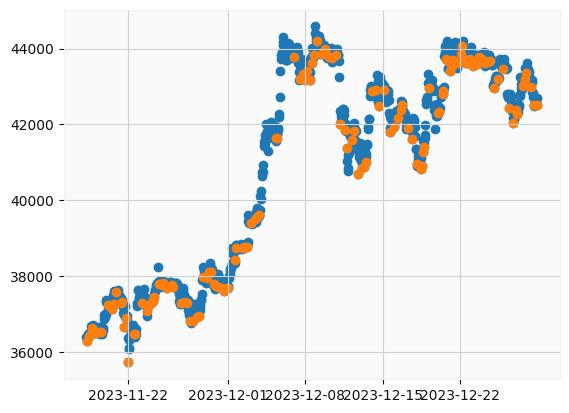

In [285]:
plt.scatter(small_period['time'], small_period['open'])
plt.scatter(open_d, open_p)

In [270]:
open_plot_data = pd.DataFrame({'op':open_p}, index=open_d).merge(small_period.set_axis(small_period['time']), how='right', left_index=True, right_index=True).fillna(0)['op']
open_plot_data

time
2023-12-25 21:00:00    0.0
2023-12-25 22:00:00    0.0
2023-12-25 23:00:00    0.0
2023-12-26 00:00:00    0.0
2023-12-26 01:00:00    0.0
                      ... 
2023-12-28 11:00:00    0.0
2023-12-28 12:00:00    0.0
2023-12-28 13:00:00    0.0
2023-12-28 14:00:00    0.0
2023-12-28 15:00:00    0.0
Name: op, Length: 67, dtype: float64

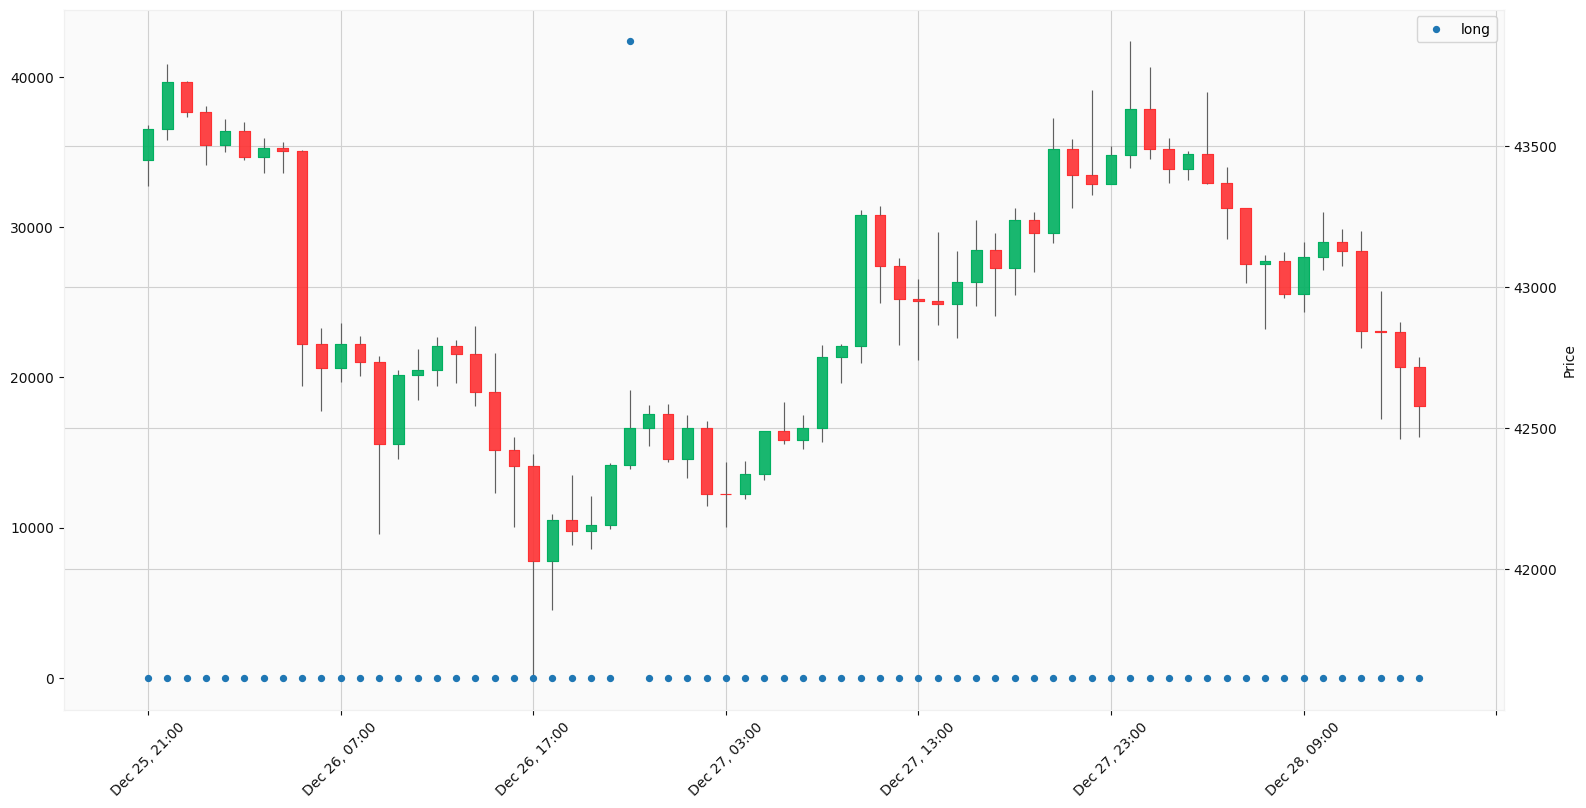

In [271]:

open_plot = mpf.make_addplot(open_plot_data, label = 'long', type = 'scatter')
plot_data = small_period.set_axis(small_period['time'])[['open','high','low','close']]
plot_data.rename(columns={'open': 'Open', 'high':'High', 'low':'Low', 'close':'Close'}, inplace=True)

mpf.plot(plot_data, addplot= open_plot,  type = 'candle', style='yahoo', figsize=(20,10))



In [ ]:
30.163